# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Make all of the comments pink
from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: pink; }</style>"))

In [3]:
# Standard Dependencies
import cv2 
import os
import shutil # Help with folder structure
import random
import numpy as np
import matplotlib.pyplot as plt
# Tensorflow Dependencies - Functional API 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf
# Import uuid library to generate unique image names
import uuid
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

# GPU
`ONLY ON COLAB` 

`I don't own a GPU to run through Jupyter`

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU') # Getting all of the GPUs on device
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# list our GPUs
gpus

[]

In [6]:
# Number of GPUs
len(gpus)

0

In [7]:
#Explain what a code does
# plt.imshow??

# Folder Structure

In [8]:
# Setup paths
MAIN = 'data'
LFW_Images = 'lfw'
POS_ARCH = 'positive archive'
ANC_ARCH = 'anchor archive'
POS_PATH = os.path.join(MAIN, 'positive')
NEG_PATH = os.path.join(MAIN, 'negative')
ANC_PATH = os.path.join(MAIN, 'anchor')

In [9]:
POS_PATH

'data\\positive'

In [10]:
# Make the directories
# I honestly just delete the folders before rerunning the entire script
# It's also redundant to have the try except pass if the file was just deleted... Don't judge me lol

# Checking if there is a data root file
if os.path.exists(MAIN):
# Remove files directories
    for f in os.listdir(POS_PATH):
        os.remove(os.path.join(POS_PATH, f))
    for f in os.listdir(NEG_PATH):
        os.remove(os.path.join(NEG_PATH, f))
    for f in os.listdir(ANC_PATH):
        os.remove(os.path.join(ANC_PATH, f))
# Remove directories
    os.rmdir(POS_PATH)
    os.rmdir(NEG_PATH)
    os.rmdir(ANC_PATH)
    os.rmdir(MAIN)
# If the folders don't exist make them
try:
    os.makedirs(POS_PATH)
    os.makedirs(NEG_PATH)
    os.makedirs(ANC_PATH)
except FileExistsError:
    pass

In [11]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
# This contains all our negatives because we are doing Siamese networks instead of Triplet Loss
!tar -xf lfw.tgz

In [12]:
# This is to show what is going on in the cell below
for directory in os.listdir(LFW_Images): # List all folders in LFW and loop through them
    for file in os.listdir(os.path.join(LFW_Images, directory)): # Within the folders of the LFW folder we loop through each image in each folder
        print(os.path.join(LFW_Images,file)) # Define the existing path of each file

lfw\Aaron_Eckhart_0001.jpg
lfw\Aaron_Guiel_0001.jpg
lfw\Aaron_Patterson_0001.jpg
lfw\Aaron_Peirsol_0001.jpg
lfw\Aaron_Peirsol_0002.jpg
lfw\Aaron_Peirsol_0003.jpg
lfw\Aaron_Peirsol_0004.jpg
lfw\Aaron_Pena_0001.jpg
lfw\Aaron_Sorkin_0001.jpg
lfw\Aaron_Sorkin_0002.jpg
lfw\Aaron_Tippin_0001.jpg
lfw\Abbas_Kiarostami_0001.jpg
lfw\Abba_Eban_0001.jpg
lfw\Abdel_Aziz_Al-Hakim_0001.jpg
lfw\Abdel_Madi_Shabneh_0001.jpg
lfw\Abdel_Nasser_Assidi_0001.jpg
lfw\Abdel_Nasser_Assidi_0002.jpg
lfw\Abdoulaye_Wade_0001.jpg
lfw\Abdoulaye_Wade_0002.jpg
lfw\Abdoulaye_Wade_0003.jpg
lfw\Abdoulaye_Wade_0004.jpg
lfw\Abdulaziz_Kamilov_0001.jpg
lfw\Abdullah_0001.jpg
lfw\Abdullah_0002.jpg
lfw\Abdullah_0003.jpg
lfw\Abdullah_0004.jpg
lfw\Abdullah_Ahmad_Badawi_0001.jpg
lfw\Abdullah_al-Attiyah_0001.jpg
lfw\Abdullah_al-Attiyah_0002.jpg
lfw\Abdullah_al-Attiyah_0003.jpg
lfw\Abdullah_Gul_0001.jpg
lfw\Abdullah_Gul_0002.jpg
lfw\Abdullah_Gul_0003.jpg
lfw\Abdullah_Gul_0004.jpg
lfw\Abdullah_Gul_0005.jpg
lfw\Abdullah_Gul_0006.jpg
lfw\

lfw\Arnie_Boehm_0001.jpg
lfw\Arnoldo_Aleman_0001.jpg
lfw\Arnoldo_Aleman_0002.jpg
lfw\Arnoldo_Aleman_0003.jpg
lfw\Arnoldo_Aleman_0004.jpg
lfw\Arnoldo_Aleman_0005.jpg
lfw\Arnold_Palmer_0001.jpg
lfw\Arnold_Palmer_0002.jpg
lfw\Arnold_Palmer_0003.jpg
lfw\Arnold_Schwarzenegger_0001.jpg
lfw\Arnold_Schwarzenegger_0002.jpg
lfw\Arnold_Schwarzenegger_0003.jpg
lfw\Arnold_Schwarzenegger_0004.jpg
lfw\Arnold_Schwarzenegger_0005.jpg
lfw\Arnold_Schwarzenegger_0006.jpg
lfw\Arnold_Schwarzenegger_0007.jpg
lfw\Arnold_Schwarzenegger_0008.jpg
lfw\Arnold_Schwarzenegger_0009.jpg
lfw\Arnold_Schwarzenegger_0010.jpg
lfw\Arnold_Schwarzenegger_0011.jpg
lfw\Arnold_Schwarzenegger_0012.jpg
lfw\Arnold_Schwarzenegger_0013.jpg
lfw\Arnold_Schwarzenegger_0014.jpg
lfw\Arnold_Schwarzenegger_0015.jpg
lfw\Arnold_Schwarzenegger_0016.jpg
lfw\Arnold_Schwarzenegger_0017.jpg
lfw\Arnold_Schwarzenegger_0018.jpg
lfw\Arnold_Schwarzenegger_0019.jpg
lfw\Arnold_Schwarzenegger_0020.jpg
lfw\Arnold_Schwarzenegger_0021.jpg
lfw\Arnold_Schwarze

lfw\Brittany_Snow_0001.jpg
lfw\Brock_Berlin_0001.jpg
lfw\Bronson_Arroyo_0001.jpg
lfw\Brooke_Adams_0001.jpg
lfw\Brooke_Gordon_0001.jpg
lfw\Brooke_Shields_0001.jpg
lfw\Brooke_Shields_0002.jpg
lfw\Brook_Robinson_0001.jpg
lfw\Bruce_Arena_0001.jpg
lfw\Bruce_Gebhardt_0001.jpg
lfw\Bruce_Lunsford_0001.jpg
lfw\Bruce_Paltrow_0001.jpg
lfw\Bruce_Springsteen_0001.jpg
lfw\Bruce_Springsteen_0002.jpg
lfw\Bruce_Springsteen_0003.jpg
lfw\Bruce_Springsteen_0004.jpg
lfw\Bruce_Van_De_Velde_0001.jpg
lfw\Bruce_Van_De_Velde_0002.jpg
lfw\Bruce_Weber_0001.jpg
lfw\Bruce_Weber_0002.jpg
lfw\Bruce_Willis_0001.jpg
lfw\Bruna_Colosio_0001.jpg
lfw\Bruno_Junquiera_0001.jpg
lfw\Bryant_Young_0001.jpg
lfw\Bryan_Adams_0001.jpg
lfw\Bryan_Chui_0001.jpg
lfw\Bryan_Cooley_0001.jpg
lfw\Bryan_Murray_0001.jpg
lfw\Bryan_Thomas_0001.jpg
lfw\Bryce_Carmine_0001.jpg
lfw\Buck_Rodgers_0001.jpg
lfw\Buddy_Ryan_0001.jpg
lfw\Budd_Schulberg_0001.jpg
lfw\Bud_Selig_0001.jpg
lfw\Bud_Selig_0002.jpg
lfw\Bud_Selig_0003.jpg
lfw\Bud_Selig_0004.jpg
lfw\

lfw\Columba_Bush_0001.jpg
lfw\Compay_Segundo_0001.jpg
lfw\Conan_OBrien_0001.jpg
lfw\Conan_OBrien_0002.jpg
lfw\Conan_OBrien_0003.jpg
lfw\Conan_OBrien_0004.jpg
lfw\Conchita_Martinez_0001.jpg
lfw\Conchita_Martinez_0002.jpg
lfw\Conchita_Martinez_0003.jpg
lfw\Condoleezza_Rice_0001.jpg
lfw\Condoleezza_Rice_0002.jpg
lfw\Condoleezza_Rice_0003.jpg
lfw\Condoleezza_Rice_0004.jpg
lfw\Condoleezza_Rice_0005.jpg
lfw\Condoleezza_Rice_0006.jpg
lfw\Condoleezza_Rice_0007.jpg
lfw\Condoleezza_Rice_0008.jpg
lfw\Condoleezza_Rice_0009.jpg
lfw\Condoleezza_Rice_0010.jpg
lfw\Condoleezza_Rice_0011.jpg
lfw\Connie_Chung_0001.jpg
lfw\Connie_Freydell_0001.jpg
lfw\Conrad_Black_0001.jpg
lfw\Constance_Marie_0001.jpg
lfw\Constance_Marie_0002.jpg
lfw\Constance_Marie_0003.jpg
lfw\Cora_Cambell_0001.jpg
lfw\Coretta_Scott_King_0001.jpg
lfw\Coretta_Scott_King_0002.jpg
lfw\Coretta_Scott_King_0003.jpg
lfw\Corey_Maggette_0001.jpg
lfw\Corinna_Harfouch_0001.jpg
lfw\Corinne_Coman_0001.jpg
lfw\Corinne_Coman_0002.jpg
lfw\Cori_Enghusen

lfw\Dorothy_Wilson_0001.jpg
lfw\Dorthy_Moxley_0001.jpg
lfw\Dorthy_Moxley_0002.jpg
lfw\Dot_Helms_0001.jpg
lfw\Douglas_Faneuil_0001.jpg
lfw\Douglas_Gansler_0001.jpg
lfw\Douglas_Meester_0001.jpg
lfw\Douglas_Paal_0001.jpg
lfw\Doug_Christie_0001.jpg
lfw\Doug_Collins_0001.jpg
lfw\Doug_Collins_0002.jpg
lfw\Doug_Duncan_0001.jpg
lfw\Doug_Duncan_0002.jpg
lfw\Doug_Melvin_0001.jpg
lfw\Doug_Melvin_0002.jpg
lfw\Doug_Melvin_0003.jpg
lfw\Doug_Moe_0001.jpg
lfw\Doug_Racine_0001.jpg
lfw\Doug_Wilson_0001.jpg
lfw\Dragan_Covic_0001.jpg
lfw\Drew_Barrymore_0001.jpg
lfw\Drew_Barrymore_0002.jpg
lfw\Drew_Bledsoe_0001.jpg
lfw\Drew_Gooden_0001.jpg
lfw\Duane_Barber_0001.jpg
lfw\Duane_Lee_Chapman_0001.jpg
lfw\Duane_Lee_Chapman_0002.jpg
lfw\Dudley_Rogers_0001.jpg
lfw\Dule_Hill_0001.jpg
lfw\Duncan_Fletcher_0001.jpg
lfw\Dunn_Lampton_0001.jpg
lfw\Dustan_Mohr_0001.jpg
lfw\Dustin_Brown_0001.jpg
lfw\Dustin_Hoffman_0001.jpg
lfw\Dusty_Baker_0001.jpg
lfw\Du_Qinglin_0001.jpg
lfw\Dwain_Kyles_0001.jpg
lfw\Dwayne_Johnson_0001.jpg

lfw\Gerard_Butler_0001.jpg
lfw\Gerard_Depardieu_0001.jpg
lfw\Gerard_Depardieu_0002.jpg
lfw\Gerard_de_Cortanze_0001.jpg
lfw\Gerard_Kleisterlee_0001.jpg
lfw\Gerard_Tronche_0001.jpg
lfw\Gerhard_Boekel_0001.jpg
lfw\Gerhard_Schmid_0001.jpg
lfw\Gerhard_Schroeder_0001.jpg
lfw\Gerhard_Schroeder_0002.jpg
lfw\Gerhard_Schroeder_0003.jpg
lfw\Gerhard_Schroeder_0004.jpg
lfw\Gerhard_Schroeder_0005.jpg
lfw\Gerhard_Schroeder_0006.jpg
lfw\Gerhard_Schroeder_0007.jpg
lfw\Gerhard_Schroeder_0008.jpg
lfw\Gerhard_Schroeder_0009.jpg
lfw\Gerhard_Schroeder_0010.jpg
lfw\Gerhard_Schroeder_0011.jpg
lfw\Gerhard_Schroeder_0012.jpg
lfw\Gerhard_Schroeder_0013.jpg
lfw\Gerhard_Schroeder_0014.jpg
lfw\Gerhard_Schroeder_0015.jpg
lfw\Gerhard_Schroeder_0016.jpg
lfw\Gerhard_Schroeder_0017.jpg
lfw\Gerhard_Schroeder_0018.jpg
lfw\Gerhard_Schroeder_0019.jpg
lfw\Gerhard_Schroeder_0020.jpg
lfw\Gerhard_Schroeder_0021.jpg
lfw\Gerhard_Schroeder_0022.jpg
lfw\Gerhard_Schroeder_0023.jpg
lfw\Gerhard_Schroeder_0024.jpg
lfw\Gerhard_Schroeder

lfw\Hikmat_al-Azzawi_0001.jpg
lfw\Hilary_Duff_0001.jpg
lfw\Hilary_Duff_0002.jpg
lfw\Hilary_Duff_0003.jpg
lfw\Hilary_McKay_0001.jpg
lfw\Hilda_Fortune_0001.jpg
lfw\Hillary_Clinton_0001.jpg
lfw\Hillary_Clinton_0002.jpg
lfw\Hillary_Clinton_0003.jpg
lfw\Hillary_Clinton_0004.jpg
lfw\Hillary_Clinton_0005.jpg
lfw\Hillary_Clinton_0006.jpg
lfw\Hillary_Clinton_0007.jpg
lfw\Hillary_Clinton_0008.jpg
lfw\Hillary_Clinton_0009.jpg
lfw\Hillary_Clinton_0010.jpg
lfw\Hillary_Clinton_0011.jpg
lfw\Hillary_Clinton_0012.jpg
lfw\Hillary_Clinton_0013.jpg
lfw\Hillary_Clinton_0014.jpg
lfw\Hilmi_Akin_Zorlu_0001.jpg
lfw\Hilmi_Ozkok_0001.jpg
lfw\Hilmi_Ozkok_0002.jpg
lfw\Himmler_Rebu_0001.jpg
lfw\Hipolito_Mejia_0001.jpg
lfw\Hipolito_Mejia_0002.jpg
lfw\Hipolito_Mejia_0003.jpg
lfw\Hipolito_Mejia_0004.jpg
lfw\Hiroki_Gomi_0001.jpg
lfw\Hiroyuki_Yoshino_0001.jpg
lfw\Hisao_Oguchi_0001.jpg
lfw\Hisao_Oguchi_0002.jpg
lfw\Hisashi_Owada_0001.jpg
lfw\Hisham_Halawi_0001.jpg
lfw\Hitomi_Soga_0001.jpg
lfw\Hitomi_Soga_0002.jpg
lfw\Hit

lfw\Jeffrey_Donaldson_0001.jpg
lfw\Jeffrey_Immelt_0001.jpg
lfw\Jeffrey_Immelt_0002.jpg
lfw\Jeffrey_Jones_0001.jpg
lfw\Jeffrey_Jones_0002.jpg
lfw\Jeffrey_Katzenberg_0001.jpg
lfw\Jeffrey_Pfeffer_0001.jpg
lfw\Jeffrey_Scott_Postell_0001.jpg
lfw\Jeffrey_Scott_Postell_0002.jpg
lfw\Jeff_Bridges_0001.jpg
lfw\Jeff_Bzdelik_0001.jpg
lfw\Jeff_Dederian_0001.jpg
lfw\Jeff_Feldman_0001.jpg
lfw\Jeff_George_0001.jpg
lfw\Jeff_Hornacek_0001.jpg
lfw\Jeff_Roehm_0001.jpg
lfw\Jeff_Schiffner_0001.jpg
lfw\Jeff_Van_Gundy_0001.jpg
lfw\Jeff_Van_Gundy_0002.jpg
lfw\Jeff_Van_Gundy_0003.jpg
lfw\Jeff_Weaver_0001.jpg
lfw\Jelena_Dokic_0001.jpg
lfw\Jelena_Dokic_0002.jpg
lfw\Jelena_Dokic_0003.jpg
lfw\Jelena_Dokic_0004.jpg
lfw\Jelena_Dokic_0005.jpg
lfw\Jelena_Dokic_0006.jpg
lfw\Jelena_Dokic_0007.jpg
lfw\Jelena_Dokic_0008.jpg
lfw\Jenna_Elfman_0001.jpg
lfw\Jennette_Bradley_0001.jpg
lfw\Jennie_Finch_0001.jpg
lfw\Jennie_Garth_0001.jpg
lfw\Jennifer_Aniston_0001.jpg
lfw\Jennifer_Aniston_0002.jpg
lfw\Jennifer_Aniston_0003.jpg
lfw\

lfw\John_Perrota_0001.jpg
lfw\John_Petty_0001.jpg
lfw\John_Philip_Elkann_0001.jpg
lfw\John_Prescott_0001.jpg
lfw\John_Reid_0001.jpg
lfw\John_Reid_0002.jpg
lfw\John_Reid_0003.jpg
lfw\John_Reilly_0001.jpg
lfw\John_Reilly_0002.jpg
lfw\John_Richardson_0001.jpg
lfw\John_Rigas_0001.jpg
lfw\John_Rigas_0002.jpg
lfw\John_Robbins_0001.jpg
lfw\John_Rosa_0001.jpg
lfw\John_Rosa_0002.jpg
lfw\John_Rosa_0003.jpg
lfw\John_Rowe_0001.jpg
lfw\John_Rowland_0001.jpg
lfw\John_Rowland_0002.jpg
lfw\John_Ruiz_0001.jpg
lfw\John_Ruiz_0002.jpg
lfw\John_Rusnak_0001.jpg
lfw\John_Salazar_0001.jpg
lfw\John_Scarlett_0001.jpg
lfw\John_Sidgmore_0001.jpg
lfw\John_Snow_0001.jpg
lfw\John_Snow_0002.jpg
lfw\John_Snow_0003.jpg
lfw\John_Snow_0004.jpg
lfw\John_Snow_0005.jpg
lfw\John_Snow_0006.jpg
lfw\John_Snow_0007.jpg
lfw\John_Snow_0008.jpg
lfw\John_Snow_0009.jpg
lfw\John_Snow_0010.jpg
lfw\John_Snow_0011.jpg
lfw\John_Snow_0012.jpg
lfw\John_Snow_0013.jpg
lfw\John_Snow_0014.jpg
lfw\John_Snow_0015.jpg
lfw\John_Snow_0016.jpg
lfw\Jo

lfw\Kieran_Culkin_0001.jpg
lfw\Kieran_Prendergast_0001.jpg
lfw\Kieran_Prendergast_0002.jpg
lfw\Kifah_Ajouri_0001.jpg
lfw\Kifah_Ajouri_0002.jpg
lfw\Kiki_Vandeweghe_0001.jpg
lfw\Kiki_Vandeweghe_0002.jpg
lfw\Kimberly_Bruckner_0001.jpg
lfw\Kimberly_Stewart_0001.jpg
lfw\Kimi_Raikkonen_0001.jpg
lfw\Kimi_Raikkonen_0002.jpg
lfw\Kimi_Raikkonen_0003.jpg
lfw\Kimora_Lee_0001.jpg
lfw\Kim_Cattrall_0001.jpg
lfw\Kim_Chinn_0001.jpg
lfw\Kim_Clijsters_0001.jpg
lfw\Kim_Clijsters_0002.jpg
lfw\Kim_Clijsters_0003.jpg
lfw\Kim_Clijsters_0004.jpg
lfw\Kim_Clijsters_0005.jpg
lfw\Kim_Clijsters_0006.jpg
lfw\Kim_Clijsters_0007.jpg
lfw\Kim_Clijsters_0008.jpg
lfw\Kim_Clijsters_0009.jpg
lfw\Kim_Clijsters_0010.jpg
lfw\Kim_Clijsters_0011.jpg
lfw\Kim_Clijsters_0012.jpg
lfw\Kim_Clijsters_0013.jpg
lfw\Kim_Clijsters_0014.jpg
lfw\Kim_Dae-jung_0001.jpg
lfw\Kim_Dae-jung_0002.jpg
lfw\Kim_Dae-jung_0003.jpg
lfw\Kim_Dae-jung_0004.jpg
lfw\Kim_Dae-jung_0005.jpg
lfw\Kim_Dae-jung_0006.jpg
lfw\Kim_Dae-jung_0007.jpg
lfw\Kim_Dae-jung_0008

lfw\Mahmoud_Abbas_0028.jpg
lfw\Mahmoud_Abbas_0029.jpg
lfw\Mahmoud_Al_Zhar_0001.jpg
lfw\Mahmoud_Diyab_al-Ahmed_0001.jpg
lfw\Makhdoom_Amin_Fahim_0001.jpg
lfw\Makhdoom_Amin_Fahim_0002.jpg
lfw\Makhdoom_Amin_Fahim_0003.jpg
lfw\Makiko_Tanaka_0001.jpg
lfw\Makiya_Ali_Hassan_0001.jpg
lfw\Malak_Habbak_0001.jpg
lfw\Malcolm_Glazer_0001.jpg
lfw\Malcolm_Jamal_Warner_0001.jpg
lfw\Malcolm_Wild_0001.jpg
lfw\Malik_Mahmud_0001.jpg
lfw\Mamdouh_Habib_0001.jpg
lfw\Manfred_Reyes_Villa_0001.jpg
lfw\Manfred_Stolpe_0001.jpg
lfw\Manfred_Stolpe_0002.jpg
lfw\Manijeh_Hekmat_0001.jpg
lfw\Manuela_Montebrun_0001.jpg
lfw\Manuel_Gehring_0001.jpg
lfw\Manuel_Jesus_0001.jpg
lfw\Manuel_Llorente_0001.jpg
lfw\Manuel_Pellegrini_0001.jpg
lfw\Manuel_Poggiali_0001.jpg
lfw\Manuel_Poggiali_0002.jpg
lfw\Manuel_Rosendo_0001.jpg
lfw\Marat_Safin_0001.jpg
lfw\Marat_Safin_0002.jpg
lfw\Marat_Safin_0003.jpg
lfw\Mara_Georges_0001.jpg
lfw\Marc-Andre_Fleury_0001.jpg
lfw\Marc-Andre_Fleury_0002.jpg
lfw\Marcella_Anderson_0001.jpg
lfw\Marcelo_Bie

lfw\Mike_Matheny_0001.jpg
lfw\Mike_Matthews_0001.jpg
lfw\Mike_Miller_0001.jpg
lfw\Mike_Miller_0002.jpg
lfw\Mike_Montgomery_0001.jpg
lfw\Mike_Montgomery_0002.jpg
lfw\Mike_Myers_0001.jpg
lfw\Mike_Myers_0002.jpg
lfw\Mike_Myers_0003.jpg
lfw\Mike_Myers_0004.jpg
lfw\Mike_Myers_0005.jpg
lfw\Mike_Myers_0006.jpg
lfw\Mike_Myers_0007.jpg
lfw\Mike_OConnell_0001.jpg
lfw\Mike_Price_0001.jpg
lfw\Mike_Price_0002.jpg
lfw\Mike_Richter_0001.jpg
lfw\Mike_Samp_0001.jpg
lfw\Mike_Scioscia_0001.jpg
lfw\Mike_Scioscia_0002.jpg
lfw\Mike_Sherman_0001.jpg
lfw\Mike_Slive_0001.jpg
lfw\Mike_Smith_0001.jpg
lfw\Mike_Stefanik_0001.jpg
lfw\Mike_Sweeney_0001.jpg
lfw\Mike_Szymanczyk_0001.jpg
lfw\Mike_Thibault_0001.jpg
lfw\Mike_Tice_0001.jpg
lfw\Mike_Tyson_0001.jpg
lfw\Mike_Tyson_0002.jpg
lfw\Mike_Tyson_0003.jpg
lfw\Mike_Tyson_0004.jpg
lfw\Mike_Webster_0001.jpg
lfw\Mike_Weir_0001.jpg
lfw\Mike_Weir_0002.jpg
lfw\Mike_Weir_0003.jpg
lfw\Mike_Weir_0004.jpg
lfw\Mike_Weir_0005.jpg
lfw\Mike_Weir_0006.jpg
lfw\Mike_Weir_0007.jpg
lfw\

lfw\Patrick_Rafter_0001.jpg
lfw\Patrick_Roy_0001.jpg
lfw\Patrick_Roy_0002.jpg
lfw\Patrick_Stewart_0001.jpg
lfw\Patrick_Stewart_0002.jpg
lfw\Patrik_Kristiansson_0001.jpg
lfw\Patsy_Hardy_0001.jpg
lfw\Patsy_Kensit_0001.jpg
lfw\Patsy_Mink_0001.jpg
lfw\Patti_Balgojevich_0001.jpg
lfw\Patti_Labelle_0001.jpg
lfw\Patti_Labelle_0002.jpg
lfw\Patti_Labelle_0003.jpg
lfw\Patti_Lank_0001.jpg
lfw\Patti_Smith_0001.jpg
lfw\Patty_Duke_0001.jpg
lfw\Patty_Schnyder_0001.jpg
lfw\Patty_Schnyder_0002.jpg
lfw\Patty_Schnyder_0003.jpg
lfw\Patty_Schnyder_0004.jpg
lfw\Patty_Sheehan_0001.jpg
lfw\Pat_Burns_0001.jpg
lfw\Pat_Burns_0002.jpg
lfw\Pat_Cox_0001.jpg
lfw\Pat_Cox_0002.jpg
lfw\Pat_DAmuro_0001.jpg
lfw\Pat_Riley_0001.jpg
lfw\Pat_Rochester_0001.jpg
lfw\Pat_Summerall_0001.jpg
lfw\Pat_Summitt_0001.jpg
lfw\Pat_Wharton_0001.jpg
lfw\Paul-Henri_Mathieu_0001.jpg
lfw\Paul-Henri_Mathieu_0002.jpg
lfw\Paul-Henri_Mathieu_0003.jpg
lfw\Paula_Abdul_0001.jpg
lfw\Paula_Dobriansky_0001.jpg
lfw\Paula_Locke_0001.jpg
lfw\Paula_Prentis

lfw\Rhina_Villatoro_0001.jpg
lfw\Ricardo_Lagos_0001.jpg
lfw\Ricardo_Lagos_0002.jpg
lfw\Ricardo_Lagos_0003.jpg
lfw\Ricardo_Lagos_0004.jpg
lfw\Ricardo_Lagos_0005.jpg
lfw\Ricardo_Lagos_0006.jpg
lfw\Ricardo_Lagos_0007.jpg
lfw\Ricardo_Lagos_0008.jpg
lfw\Ricardo_Lagos_0009.jpg
lfw\Ricardo_Lagos_0010.jpg
lfw\Ricardo_Lagos_0011.jpg
lfw\Ricardo_Lagos_0012.jpg
lfw\Ricardo_Lagos_0013.jpg
lfw\Ricardo_Lagos_0014.jpg
lfw\Ricardo_Lagos_0015.jpg
lfw\Ricardo_Lagos_0016.jpg
lfw\Ricardo_Lagos_0017.jpg
lfw\Ricardo_Lagos_0018.jpg
lfw\Ricardo_Lagos_0019.jpg
lfw\Ricardo_Lagos_0020.jpg
lfw\Ricardo_Lagos_0021.jpg
lfw\Ricardo_Lagos_0022.jpg
lfw\Ricardo_Lagos_0023.jpg
lfw\Ricardo_Lagos_0024.jpg
lfw\Ricardo_Lagos_0025.jpg
lfw\Ricardo_Lagos_0026.jpg
lfw\Ricardo_Lagos_0027.jpg
lfw\Ricardo_Lopez_Murphy_0001.jpg
lfw\Ricardo_Lopez_Murphy_0002.jpg
lfw\Ricardo_Maduro_0001.jpg
lfw\Ricardo_Maduro_0002.jpg
lfw\Ricardo_Mayorga_0001.jpg
lfw\Ricardo_Monasterio_0001.jpg
lfw\Ricardo_Monasterio_0002.jpg
lfw\Ricardo_Sanchez_0001.

lfw\Sandra_Milo_0001.jpg
lfw\Sandra_Shamas_0001.jpg
lfw\Sandy_Smith_0001.jpg
lfw\Sandy_Wise_0001.jpg
lfw\Sanjay_Chawla_0001.jpg
lfw\Sanjay_Gupta_0001.jpg
lfw\Sanja_Papic_0001.jpg
lfw\Santiago_Botero_0001.jpg
lfw\San_Lan_0001.jpg
lfw\Saoud_Al_Faisal_0001.jpg
lfw\Saparmurat_Niyazov_0001.jpg
lfw\Saparmurat_Niyazov_0002.jpg
lfw\Sarah_Canale_0001.jpg
lfw\Sarah_Hughes_0001.jpg
lfw\Sarah_Hughes_0002.jpg
lfw\Sarah_Hughes_0003.jpg
lfw\Sarah_Hughes_0004.jpg
lfw\Sarah_Hughes_0005.jpg
lfw\Sarah_Hughes_0006.jpg
lfw\Sarah_Jessica_Parker_0001.jpg
lfw\Sarah_Jessica_Parker_0002.jpg
lfw\Sarah_Jessica_Parker_0003.jpg
lfw\Sarah_Jessica_Parker_0004.jpg
lfw\Sarah_Jessica_Parker_0005.jpg
lfw\Sarah_Jessica_Parker_0006.jpg
lfw\Sarah_Michelle_Gellar_0001.jpg
lfw\Sarah_Michelle_Gellar_0002.jpg
lfw\Sarah_Michelle_Gellar_0003.jpg
lfw\Sarah_Price_0001.jpg
lfw\Sarah_Weddington_0001.jpg
lfw\Sarah_Wynter_0001.jpg
lfw\Sara_Elisabeth_Ahmad_0001.jpg
lfw\Sara_Silverman_0001.jpg
lfw\Sargis_Sargsian_0001.jpg
lfw\Sasha_Alexa

lfw\Taoufik_Mathlouthi_0001.jpg
lfw\Tara_Dawn_Christensen_0001.jpg
lfw\Tara_Kirk_0001.jpg
lfw\Tara_Reid_0001.jpg
lfw\Tara_VanDerveer_0001.jpg
lfw\Tariq_Aziz_0001.jpg
lfw\Tariq_Aziz_0002.jpg
lfw\Tariq_Aziz_0003.jpg
lfw\Tariq_Aziz_0004.jpg
lfw\Tariq_Aziz_0005.jpg
lfw\Tariq_Aziz_0006.jpg
lfw\Tassos_Papadopoulos_0001.jpg
lfw\Tassos_Papadopoulos_0002.jpg
lfw\Tassos_Papadopoulos_0003.jpg
lfw\Tatiana_Gratcheva_0001.jpg
lfw\Tatiana_Kennedy_Schlossberg_0001.jpg
lfw\Tatiana_Panova_0001.jpg
lfw\Tatiana_Paus_0001.jpg
lfw\Tatiana_Shchegoleva_0001.jpg
lfw\Tatjana_Gsell_0001.jpg
lfw\Tatsuya_Fuji_0001.jpg
lfw\Tatyana_Tomashova_0001.jpg
lfw\Taufik_Hidayat_0001.jpg
lfw\Taufik_Hidayat_0002.jpg
lfw\Taufik_Hidayat_0003.jpg
lfw\Taufik_Kiemas_0001.jpg
lfw\Tavis_Smiley_0001.jpg
lfw\Taylor_Twellman_0001.jpg
lfw\Taylyn_Solomon_0001.jpg
lfw\Tayshaun_Prince_0001.jpg
lfw\Tayyeb_Abdel_Rahim_0001.jpg
lfw\TA_McLendon_0001.jpg
lfw\Teddy_Kollek_0001.jpg
lfw\Ted_Christopher_0001.jpg
lfw\Ted_Costa_0001.jpg
lfw\Ted_Maher_

lfw\Vaclav_Klaus_0001.jpg
lfw\Vaclav_Klaus_0002.jpg
lfw\Vadim_Devyatovskiy_0001.jpg
lfw\Vadim_Strogalev_0001.jpg
lfw\Vagit_Alekperov_0001.jpg
lfw\Valdas_Adamkus_0001.jpg
lfw\Valdas_Adamkus_0002.jpg
lfw\Valentina_Cervi_0001.jpg
lfw\Valentina_Tereshkova_0001.jpg
lfw\Valentino_Rossi_0001.jpg
lfw\Valentino_Rossi_0002.jpg
lfw\Valentino_Rossi_0003.jpg
lfw\Valentino_Rossi_0004.jpg
lfw\Valentino_Rossi_0005.jpg
lfw\Valentino_Rossi_0006.jpg
lfw\Valerie_Harper_0001.jpg
lfw\Valerie_Harper_0002.jpg
lfw\Valerie_Thwaites_0001.jpg
lfw\Valeri_Bure_0001.jpg
lfw\Valery_Giscard_dEstaing_0001.jpg
lfw\Valery_Giscard_dEstaing_0002.jpg
lfw\Valery_Giscard_dEstaing_0003.jpg
lfw\Valery_Giscard_dEstaing_0004.jpg
lfw\Valery_Giscard_dEstaing_0005.jpg
lfw\Valery_Giscard_dEstaing_0006.jpg
lfw\Valorie_Brabazon_0001.jpg
lfw\Val_Ackerman_0001.jpg
lfw\Vanessa_Incontrada_0001.jpg
lfw\Vanessa_Incontrada_0002.jpg
lfw\Vanessa_Incontrada_0003.jpg
lfw\Vanessa_Incontrada_0004.jpg
lfw\Vanessa_Laine_0001.jpg
lfw\Vanessa_Redgrave_

In [13]:
# Move LFW Images to data/negative by looping through each folder
for directory in os.listdir(LFW_Images): # List all folders in LFW and loop through them
    for file in os.listdir(os.path.join(LFW_Images, directory)): # Within the folders of the LFW folder we loop through each image in each folder
        EX_PATH = os.path.join(LFW_Images, directory, file) # Define the existing path of each file
        NEW_PATH = os.path.join(NEG_PATH, file) # Define the new path which is in the data folder I created earlier by passing through our file name
        os.replace(EX_PATH, NEW_PATH) # Move the images from our existing path and bring them to our new path

In [14]:
# Now all of the LFW folders are empty
# Remove the subdirectories of LFW folder
def drop_empty_folders(directory):
    for dirpath, dirnames, filenames in os.walk(directory, topdown=False):
        if not dirnames and not filenames:
            os.rmdir(dirpath)
drop_empty_folders(LFW_Images)
# Remove the main LFW folder
os.rmdir(LFW_Images)

# Collect Positive and Anchor Images

In [15]:
# load webcam
cap = cv2.VideoCapture(0)  # 0 for default webcam and index up if you have more then they are other numbers
# Videos are sequences of images
while cap.isOpened(): # Loop through every frame in our webcam
    success, img = cap.read() # Read our capture in a point and time
    cv2.imshow("Video", img) # Show image back to the screen
    if cv2.waitKey(1) & 0xFF == ord('q'): # Closes in 1ms AND # if I press q it closes the video(frames) by breaking out of the loop
        break
# Release the webcam... helps with lag and freeze
cap.release()
# Close the windows
cv2.destroyAllWindows()

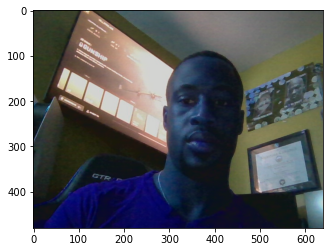

In [16]:
# OpenCV has a different channel order for coloring so the color is weird
plt.imshow(img)

In [17]:
# Shape of the frames
img.shape

(480, 640, 3)

In [18]:
#Example of what uuid does
print('The format without the file path: ','{}.jpg'.format(uuid.uuid1()))
# uuid with file path
print('The format with the file path: ',os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())))

The format without the file path:  9681f06f-5c00-11ed-9ce1-085bd665a724.jpg
The format with the file path:  data\anchor\9681f070-5c00-11ed-afd8-085bd665a724.jpg


In [19]:
# I need this to be 250 x 250 pixel
# load webcam
cap = cv2.VideoCapture(0)  # 0 for default webcam and index up if you have more then they are other numbers
# Videos are sequences of images
while cap.isOpened(): # Loop through every frame in our webcam
    
    success, img = cap.read() # Read our capture in a point and time
    
    img = img[120:120+250,200:200+250, :] # Cut down frame to 250x250px
    
    if cv2.waitKey(1) & 0xFF == ord('a'): # Collect anchor
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, img)
    
    if cv2.waitKey(1) & 0xFF == ord('p'): # Collect positive
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, img)
        
    cv2.imshow("Video", img) # Show image back to the screen
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # Closes in 1ms AND # if I press q it closes the video(frames) by breaking out of the loop
        break
# Release the webcam... helps with lag and freeze
cap.release()
# Close the windows
cv2.destroyAllWindows()

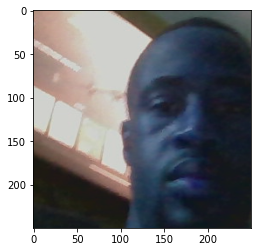

In [20]:
# OpenCV has a different channel order for coloring so the color is weird
plt.imshow(img)

In [21]:
# Shape of the frames
img.shape

(250, 250, 3)

# Folder Structure Part 2

In [22]:
# So I Don't have to take new positive pictures all the time
# I delete the positive files every rerun so I have a place I archive all my file
if not os.path.exists(POS_ARCH):
    os.makedirs(POS_ARCH)
    
# Copies all the positive files to archive folder
for file_name in os.listdir(POS_PATH):
    full_file_name = os.path.join(POS_PATH, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, POS_ARCH)

# Copies all the archive files to positive folder
for file_name in os.listdir(POS_ARCH):
    full_file_name = os.path.join(POS_ARCH, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, POS_PATH)

In [23]:
# So I Don't have to take new anchor pictures all the time
# I delete the anchor files every rerun so I have a place I archive all my file
if not os.path.exists(ANC_ARCH):
    os.makedirs(ANC_ARCH)
    
# Copies all the anchor files to archive folder
for file_name in os.listdir(ANC_PATH):
    full_file_name = os.path.join(ANC_PATH, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, ANC_ARCH)

# Copies all the archive files to anchor folder
for file_name in os.listdir(ANC_ARCH):
    full_file_name = os.path.join(ANC_ARCH, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, ANC_PATH)

# Load and Preprocess Images

In [24]:
# Load Images by directory
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [25]:
# Example with Anchor Path of what is going on above
print('Path with the wild card: ', ANC_PATH+'\*.jpg')
dir_test = anchor.as_numpy_iterator()
print('1st Full Path: ', dir_test.next())
print('Next Full Path: ', dir_test.next())

Path with the wild card:  data\anchor\*.jpg
1st Full Path:  b'data\\anchor\\2f8a1195-5baf-11ed-9594-085bd665a724.jpg'
Next Full Path:  b'data\\anchor\\355f57aa-5baf-11ed-bc2a-085bd665a724.jpg'


In [26]:
def preprocess(file_path):
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    # Return image
    return img

Image Max:  0.91862744
Image Min:  0.0031862746


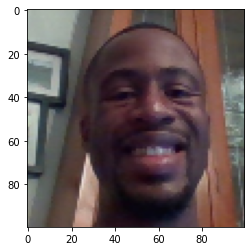

In [27]:
# The results of the preprocessing
img = preprocess('data\\anchor\\2b74c825-5baf-11ed-b4e1-085bd665a724.jpg')
print('Image Max: ', img.numpy().max())
print('Image Min: ', img.numpy().min())
plt.imshow(img)

In [28]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [29]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0
print('How the positives will look: ',tf.ones(len(anchor)))
print('How the negatives will look: ',tf.zeros(len(anchor)))

How the positives will look:  tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(300,), dtype=float32)
How the negativ

In [30]:
# Example
sample = data.as_numpy_iterator()
sample = sample.next()
print(data)
print(sample)

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>
(b'data\\anchor\\23ec0f16-5baf-11ed-82a9-085bd665a724.jpg', b'data\\positive\\eb0ad80c-5bae-11ed-af58-085bd665a724.jpg', 1.0)


In [31]:
#Preprocess for the shape above
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [32]:
# Example of the preprocess
res = preprocess_twin(*sample) # The Star is to unpack the tuple that we made when zipping negatives and positive
print(len(res))
res

3


(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.6963235 , 0.7355392 , 0.7002451 ],
         [0.7012255 , 0.7375    , 0.7031863 ],
         [0.6791667 , 0.70661765, 0.6781863 ],
         ...,
         [0.29583332, 0.27622548, 0.2605392 ],
         [0.2872549 , 0.26764706, 0.25196078],
         [0.28627452, 0.26666668, 0.2509804 ]],
 
        [[0.7004902 , 0.7367647 , 0.702451  ],
         [0.68284315, 0.71911764, 0.6848039 ],
         [0.6698529 , 0.7017157 , 0.67107844],
         ...,
         [0.2769608 , 0.26642156, 0.24803922],
         [0.28357843, 0.26642156, 0.2509804 ],
         [0.28627452, 0.26666668, 0.25196078]],
 
        [[0.70343137, 0.73088235, 0.6995098 ],
         [0.685049  , 0.7147059 , 0.68259805],
         [0.67009807, 0.7085784 , 0.6735294 ],
         ...,
         [0.2740196 , 0.26936275, 0.25392157],
         [0.2740196 , 0.2605392 , 0.24803922],
         [0.28333333, 0.26666668, 0.25490198]],
 
        ...,
 
        [[0.5210784 , 0.51960784

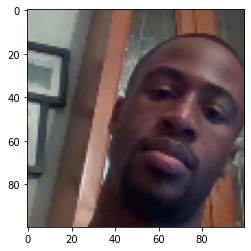

In [33]:
plt.imshow(res[0])

In [34]:
# Build data loader pipeline
data = data.map(preprocess_twin)
data = data.cache() # keep recent used data in memory location that has cheap and fast access
data = data.shuffle(buffer_size=1024)

In [35]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [36]:
# Training partition
train_data = data.take(round(len(data)*.7)) # Grabs 70% of the data
train_data = train_data.batch(16) 
train_data = train_data.prefetch(8) # prevent bottleneck by preprocess the next set of images early

In [37]:
# None is the number of images in our batch
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [38]:
# Example
sample = train_data.as_numpy_iterator()
sample = sample.next()
print(len(sample[0]))

16


In [39]:
# Training partition
test_data = data.skip(round(len(data)*.7)) # skip train data of the data
test_data = test_data.take(round(len(data)*.3)) # Grabs 30% of the data
test_data = test_data.batch(16) 
test_data = test_data.prefetch(8) # prevent bottleneck by preprocess the next set of images early

# Building The Model

In [40]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid', name='output_image')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [41]:
#This is a summary of the function we are going to use
embedding = make_embedding()
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [42]:
# Subtracting the L1  distances from one another to see similarity
# Siamese L1 Distance class
class L1Dist(Layer):
    
    
    # Init method - inheritance
    def __init__(self, **kwargs): # perform actions on self and **kwargs allows you to work thiss layer as a bigger layer
        super().__init__()
        
    # similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [43]:
# Combines everything together
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [44]:
siamese_model = make_siamese_model()
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [45]:
# Either positive or negative
binary_cross_loss = tf.losses.BinaryCrossentropy() # inputs for loss function isn't normalize so the from_logits=True might make the function better 

In [46]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

To reload from the checkpoint you can use model.load("path of checkpoint"). This will reload pretrained weights. Into existing model.

In [47]:
# Checkpoint to get back previous models I made 
checkpoint_dir = 'Training Checkpoints'
# If the folders don't exist make them
try:
    os.makedirs(checkpoint_dir)
except FileExistsError:
    pass

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [48]:
@tf.function # we can convert a function into a Tensorflow Graph (tf.Graph) and lazy execute it
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

In [49]:
# To train the data
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [50]:
train(train_data, 50)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 680s 25s/step

 Epoch 2/50
27/27 [==============================] - 588s 22s/step

 Epoch 3/50
27/27 [==============================] - 589s 22s/step

 Epoch 4/50
27/27 [==============================] - 580s 21s/step

 Epoch 5/50
27/27 [==============================] - 586s 22s/step

 Epoch 6/50
27/27 [==============================] - 582s 21s/step

 Epoch 7/50
27/27 [==============================] - 578s 21s/step

 Epoch 8/50
27/27 [==============================] - 575s 21s/step

 Epoch 9/50
27/27 [==============================] - 572s 21s/step

 Epoch 10/50
27/27 [==============================] - 571s 21s/step

 Epoch 11/50
27/27 [==============================] - 587s 22s/step

 Epoch 12/50
27/27 [==============================] - 580s 21s/step

 Epoch 13/50
27/27 [======

# Evaluate Model

In [51]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [52]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 2s 2s/step


In [53]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

#Same as
# res =[]
#for prediction in y_hat:
 #   if prediction > 0.5:
  #      res.append(1)
   # else:
    #    res.append(0)

[0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]

In [54]:
# Creating a metric object 
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
# Calculating the recall/percision value 
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 
# Return Recall Result
print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 384ms/step
1.0 1.0


# Save The Model

In [55]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

In [62]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [63]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 1s 603ms/step


array([[1.0000000e+00],
       [9.9999952e-01],
       [3.3248213e-07],
       [1.0000000e+00]], dtype=float32)

In [64]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# Real Time Test

In [65]:
# Setup paths
App_path = 'application_data'
verification_images = os.path.join(App_path, 'verification_images')
input_images = os.path.join(App_path, 'input_image')
# Checking if there is a data root file
if os.path.exists(App_path):
# Remove files directories
    for f in os.listdir(input_images):
        os.remove(os.path.join(input_images, f))
    for f in os.listdir(verification_images):
        os.remove(os.path.join(verification_images, f))
# Remove directories
    os.rmdir(input_images)
    os.rmdir(verification_images)
    os.rmdir(App_path)
# If the folders don't exist make them
try:
    os.makedirs(input_images)
    os.makedirs(verification_images)
except FileExistsError:
    pass

# empty list for collecting files
source_files = []  
# walk through directory tree and find files only
for dirpath, dirnames, filenames in os.walk(POS_PATH):
    for file in filenames:
            source_files.append(os.path.join(dirpath, file))
# select 50 files randomly               
choices = random.sample(source_files, 50)
# copy files to target directory
for files in choices:
    shutil.copy(files, verification_images)

In [66]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(verification_images): # Loop through all verification images
        input_img = preprocess(os.path.join(input_images, 'input_image.jpg')) # preprocess our camera image
        validation_img = preprocess(os.path.join(verification_images, image)) # preprocess our verification image
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(verification_images)) 
    verified = verification > verification_threshold
    
    return results, verified

In [67]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):

        cv2.imwrite(os.path.join(input_images, 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 235ms/step
False
